In [52]:
pip install numpy matplotlib scikit-learn catboost xgboost lightgbm

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [53]:
import sklearn
print(sklearn.__version__)  # В среде обучения

1.4.2


In [46]:
from platform import python_version

print(python_version())

3.10.0


In [47]:
pip install pycaret

  Using cached pandas-2.1.4-cp310-cp310-win_amd64.whl.metadata (18 kB)
  Using cached scikit_learn-1.4.2-cp310-cp310-win_amd64.whl.metadata (11 kB)
Using cached pandas-2.1.4-cp310-cp310-win_amd64.whl (10.7 MB)
Using cached scikit_learn-1.4.2-cp310-cp310-win_amd64.whl (10.6 MB)

  Attempting uninstall: scikit-learn

    Found existing installation: scikit-learn 1.6.1

    Uninstalling scikit-learn-1.6.1:

   ---------------------------------------- 0/2 [scikit-learn]
      Successfully uninstalled scikit-learn-1.6.1
   ---------------------------------------- 0/2 [scikit-learn]
   ---------------------------------------- 0/2 [scikit-learn]
   ---------------------------------------- 0/2 [scikit-learn]
   ---------------------------------------- 0/2 [scikit-learn]
   ---------------------------------------- 0/2 [scikit-learn]
   ---------------------------------------- 0/2 [scikit-learn]
   ---------------------------------------- 0/2 [scikit-learn]
   -----------------------------------


[notice] A new release of pip is available: 25.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [48]:
import catboost
print(catboost.__version__)

1.2.8


In [21]:
pip install --upgrade catboost

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


1.4.2


In [54]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_text, plot_tree
from sklearn.ensemble import (
    BaggingClassifier, BaggingRegressor,
    RandomForestClassifier, RandomForestRegressor,
    GradientBoostingClassifier, GradientBoostingRegressor,
    StackingClassifier, StackingRegressor
)
from sklearn.linear_model import LogisticRegression, Ridge
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score
from xgboost import XGBClassifier, XGBRegressor
from lightgbm import LGBMClassifier, LGBMRegressor
from catboost import CatBoostClassifier, CatBoostRegressor
import matplotlib.pyplot as plt
from pycaret.classification import *
from pycaret.regression import *
from sklearn.base import ClassifierMixin
from sklearn import tree
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


In [55]:
# Классификация
df_class = pd.read_csv(r'C:\Users\Zver\Desktop\ML\data\smoke_detector_task_filtered.csv', 
                      sep=',', 
                      encoding='utf-8')
df_class = df_class.drop(['Unnamed: 0'], axis=1)
class_label = 'Fire Alarm'
class_features = ['TVOC[ppb]', 'eCO2[ppm]', 'Temperature[C]', 'PM2.5', 'NC2.5', 'Humidity[%]',	'Raw H2', 'Raw Ethanol', 'Pressure[hPa]', 'PM1.0', 'NC0.5',	'NC1.0']
X_class, y_class = df_class[class_features].values, df_class[class_label].values

# Регрессия
df_reg = pd.read_csv(r'C:\Users\Zver\Desktop\ML\data\moldova_cars_task_filtered_ohe.csv', 
                    sep=',', 
                    encoding='utf-8')
reg_label = 'Price(euro)'
reg_features = ['Year', 'Distance', 'Engine_capacity(cm3)', 'Transmission']
X_reg, y_reg = df_reg[reg_features].values, df_reg[reg_label].values

# Разделение данных
X_class_train, X_class_test, y_class_train, y_class_test = train_test_split(X_class, y_class, test_size=0.2, random_state=42)
X_reg_train, X_reg_test, y_reg_train, y_reg_test = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

In [56]:
df_class

,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,Fire Alarm
0,20.391,49.37,30,445,12478.0,19500,939.771,0.17,0.58,0.14,0.665,0.398,0
1,20.406,49.58,36,455,12472.0,19487,939.770,0.16,0.56,0.13,0.644,0.385,0
2,20.420,50.11,20,443,12471.0,19493,939.775,0.15,0.52,0.12,0.595,0.356,0
3,20.434,50.68,16,435,12481.0,19509,939.772,0.14,0.50,0.12,0.569,0.340,0
4,20.448,51.23,8,440,12482.0,19520,939.772,0.13,0.45,0.11,0.514,0.308,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
59872,18.438,15.79,625,400,13723.0,20569,936.670,0.63,0.65,4.32,0.673,0.015,0
59873,18.653,15.87,612,400,13731.0,20588,936.678,0.61,0.63,4.18,0.652,0.015,0
59874,18.867,15.84,627,400,13725.0,20582,936.687,0.57,0.60,3.95,0.617,0.014,0
59875,19.083,16.04,638,400,13712.0,20566,936.680,0.57,0.59,3.92,0.611,0.014,0


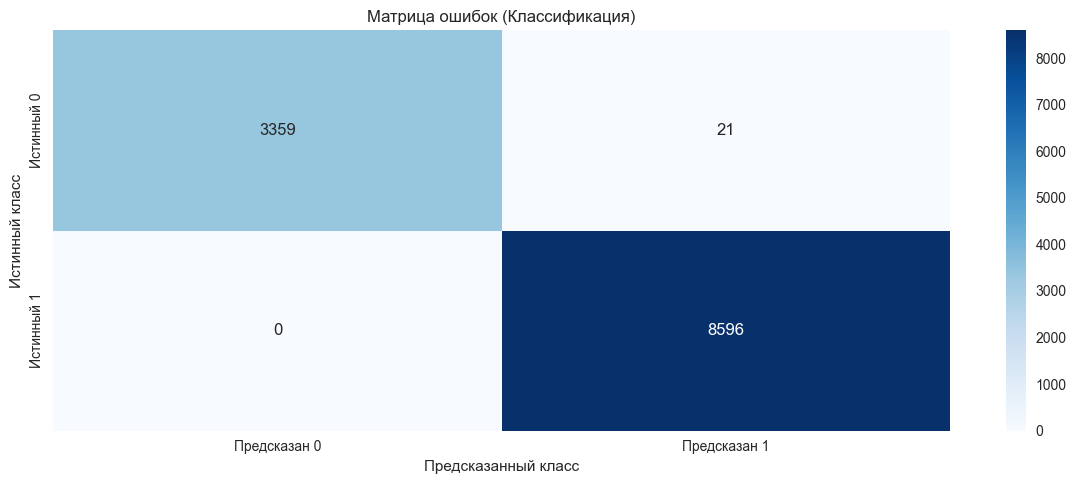

In [12]:
# Обучение базовых деревьев решений
# Классификация
best_dt_classifier = DecisionTreeClassifier(
    max_depth=6,         
    min_samples_split=5,
    random_state=42
)
best_dt_classifier.fit(X_class_train, y_class_train)

plt.figure(figsize=(12, 5))
# Матрица ошибок
y_pred = best_dt_classifier.predict(X_class_test)
cm = confusion_matrix(y_class_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
           xticklabels=['Предсказан 0', 'Предсказан 1'],
           yticklabels=['Истинный 0', 'Истинный 1'])
plt.title('Матрица ошибок (Классификация)')
plt.ylabel('Истинный класс')
plt.xlabel('Предсказанный класс')
plt.tight_layout()
plt.show()

- коэф Джини — мера разнообразия в распределении вероятностей классов. если коэффициент равен 0, то все эоементы принадлежат в узле одному классу. если 0,5 то равномерно распределены.

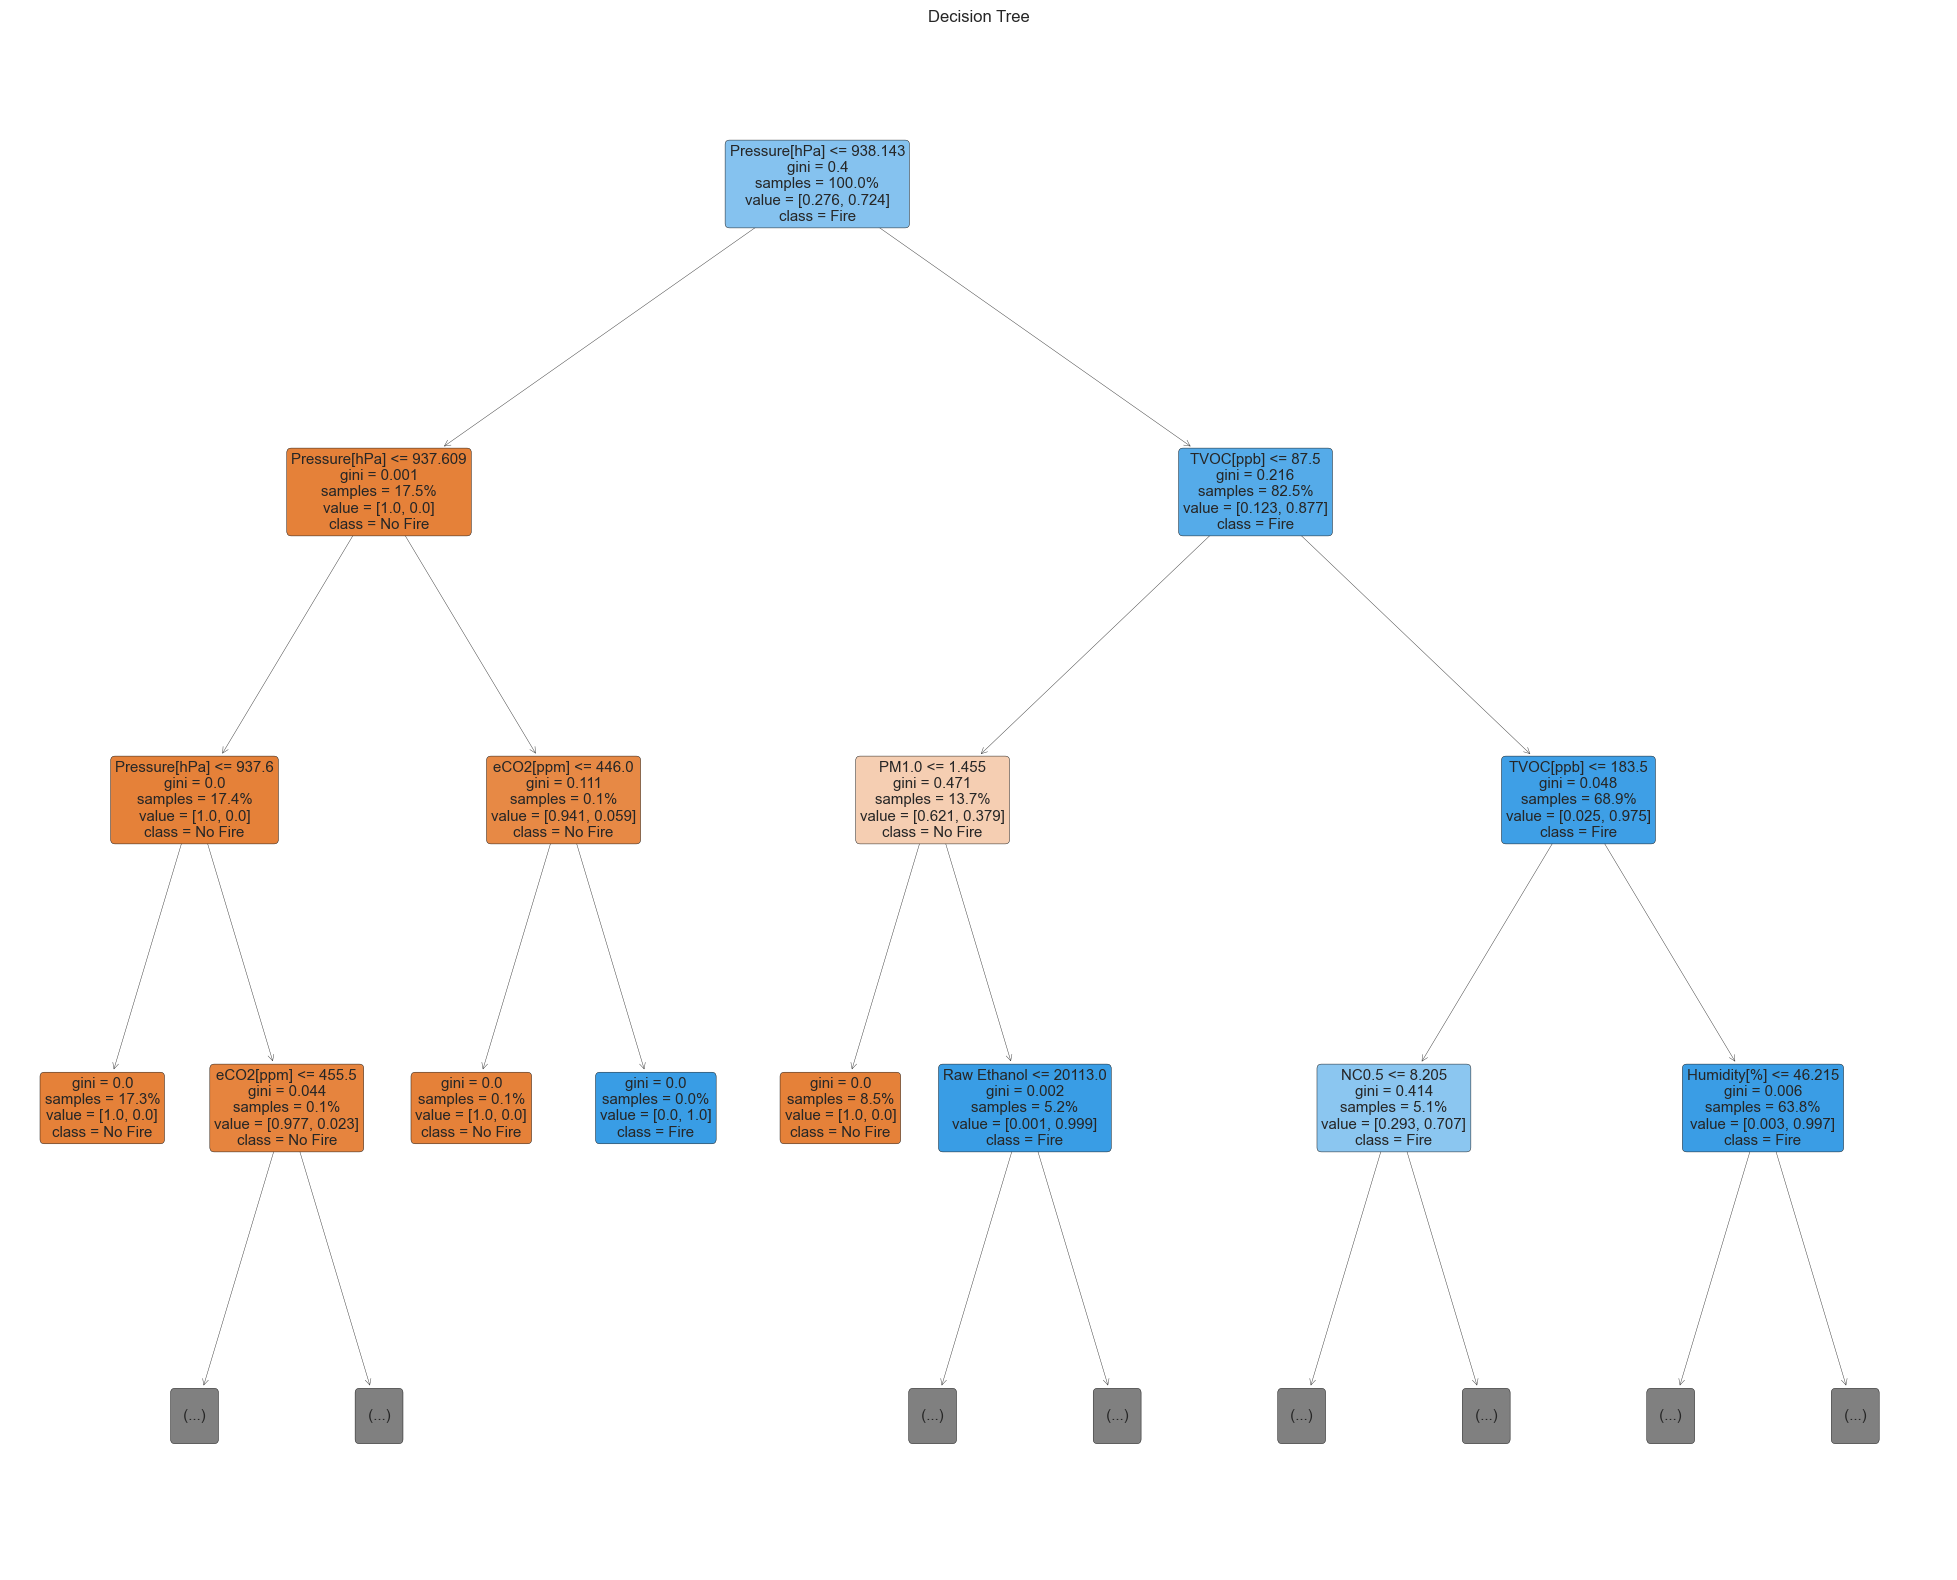

Classification Tree: |--- Pressure[hPa] <= 938.14
|   |--- Pressure[hPa] <= 937.61
|   |   |--- Pressure[hPa] <= 937.60
|   |   |   |--- class: 0
|   |   |--- Pressure[hPa] >  937.60
|   |   |   |--- eCO2[ppm] <= 455.50
|   |   |   |   |--- class: 0
|   |   |   |--- eCO2[ppm] >  455.50
|   |   |   |   |--- class: 1
|   |--- Pressure[hPa] >  937.61
|   |   |--- eCO2[ppm] <= 446.00
|   |   |   |--- class: 0
|   |   |--- eCO2[ppm] >  446.00
|   |   |   |--- class: 1
|--- Pressure[hPa] >  938.14
|   |--- TVOC[ppb] <= 87.50
|   |   |--- PM1.0 <= 1.46
|   |   |   |--- class: 0
|   |   |--- PM1.0 >  1.46
|   |   |   |--- Raw Ethanol <= 20113.00
|   |   |   |   |--- class: 0
|   |   |   |--- Raw Ethanol >  20113.00
|   |   |   |   |--- class: 1
|   |--- TVOC[ppb] >  87.50
|   |   |--- TVOC[ppb] <= 183.50
|   |   |   |--- NC0.5 <= 8.20
|   |   |   |   |--- truncated branch of depth 3
|   |   |   |--- NC0.5 >  8.20
|   |   |   |   |--- truncated branch of depth 3
|   |   |--- TVOC[ppb] >  183.50

In [13]:
# Для классификации
plt.figure(figsize=(25, 20))
tree.plot_tree(
    best_dt_classifier,
    feature_names=class_features,  
    class_names=['No Fire', 'Fire'],
    filled=True,
    rounded=True,
    proportion=True,
    max_depth=3,
)
plt.title("Decision Tree")
plt.show()

# Текстовое представление правил 
tree_rules_class = export_text(
    best_dt_classifier,
    feature_names=class_features,
    max_depth=3
)

print("Classification Tree:", tree_rules_class)

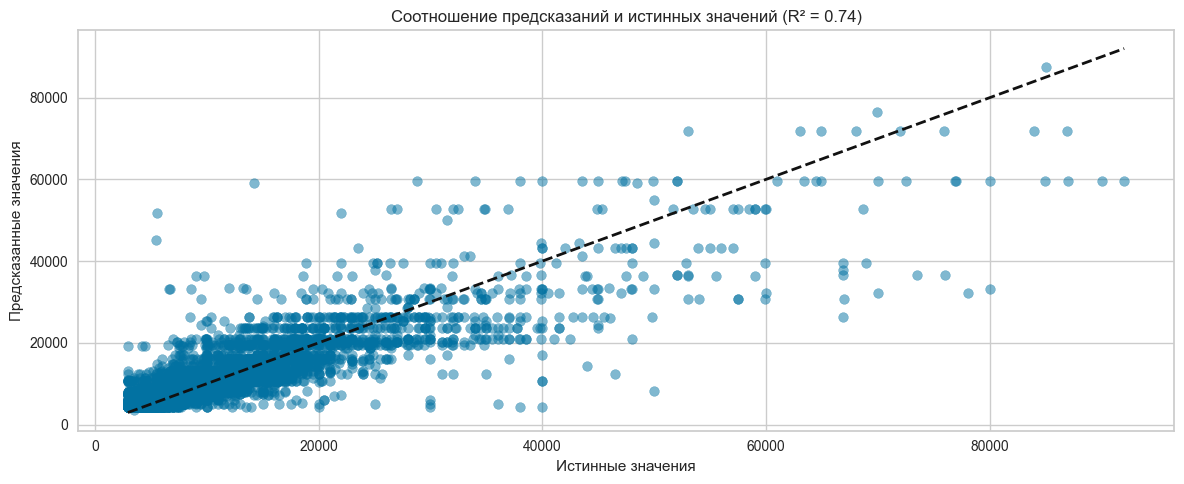

In [8]:
# Регрессия
best_dt_regressor = DecisionTreeRegressor(
    max_depth=7, 
    min_samples_split=5,  
    random_state=42
)
best_dt_regressor.fit(X_reg_train, y_reg_train) 

plt.figure(figsize=(12, 5))
# График предсказанных и истинных значений
y_pred_reg = best_dt_regressor.predict(X_reg_test)
r2 = r2_score(y_reg_test, y_pred_reg)

plt.scatter(y_reg_test, y_pred_reg, alpha=0.5)
plt.plot([y_reg_test.min(), y_reg_test.max()], 
         [y_reg_test.min(), y_reg_test.max()], 
         'k--', lw=2)
plt.xlabel('Истинные значения')
plt.ylabel('Предсказанные значения')
plt.title(f'Соотношение предсказаний и истинных значений (R² = {r2:.2f})')
plt.tight_layout()
plt.show()

- используем MSE - среднюю квадратическую ошибку

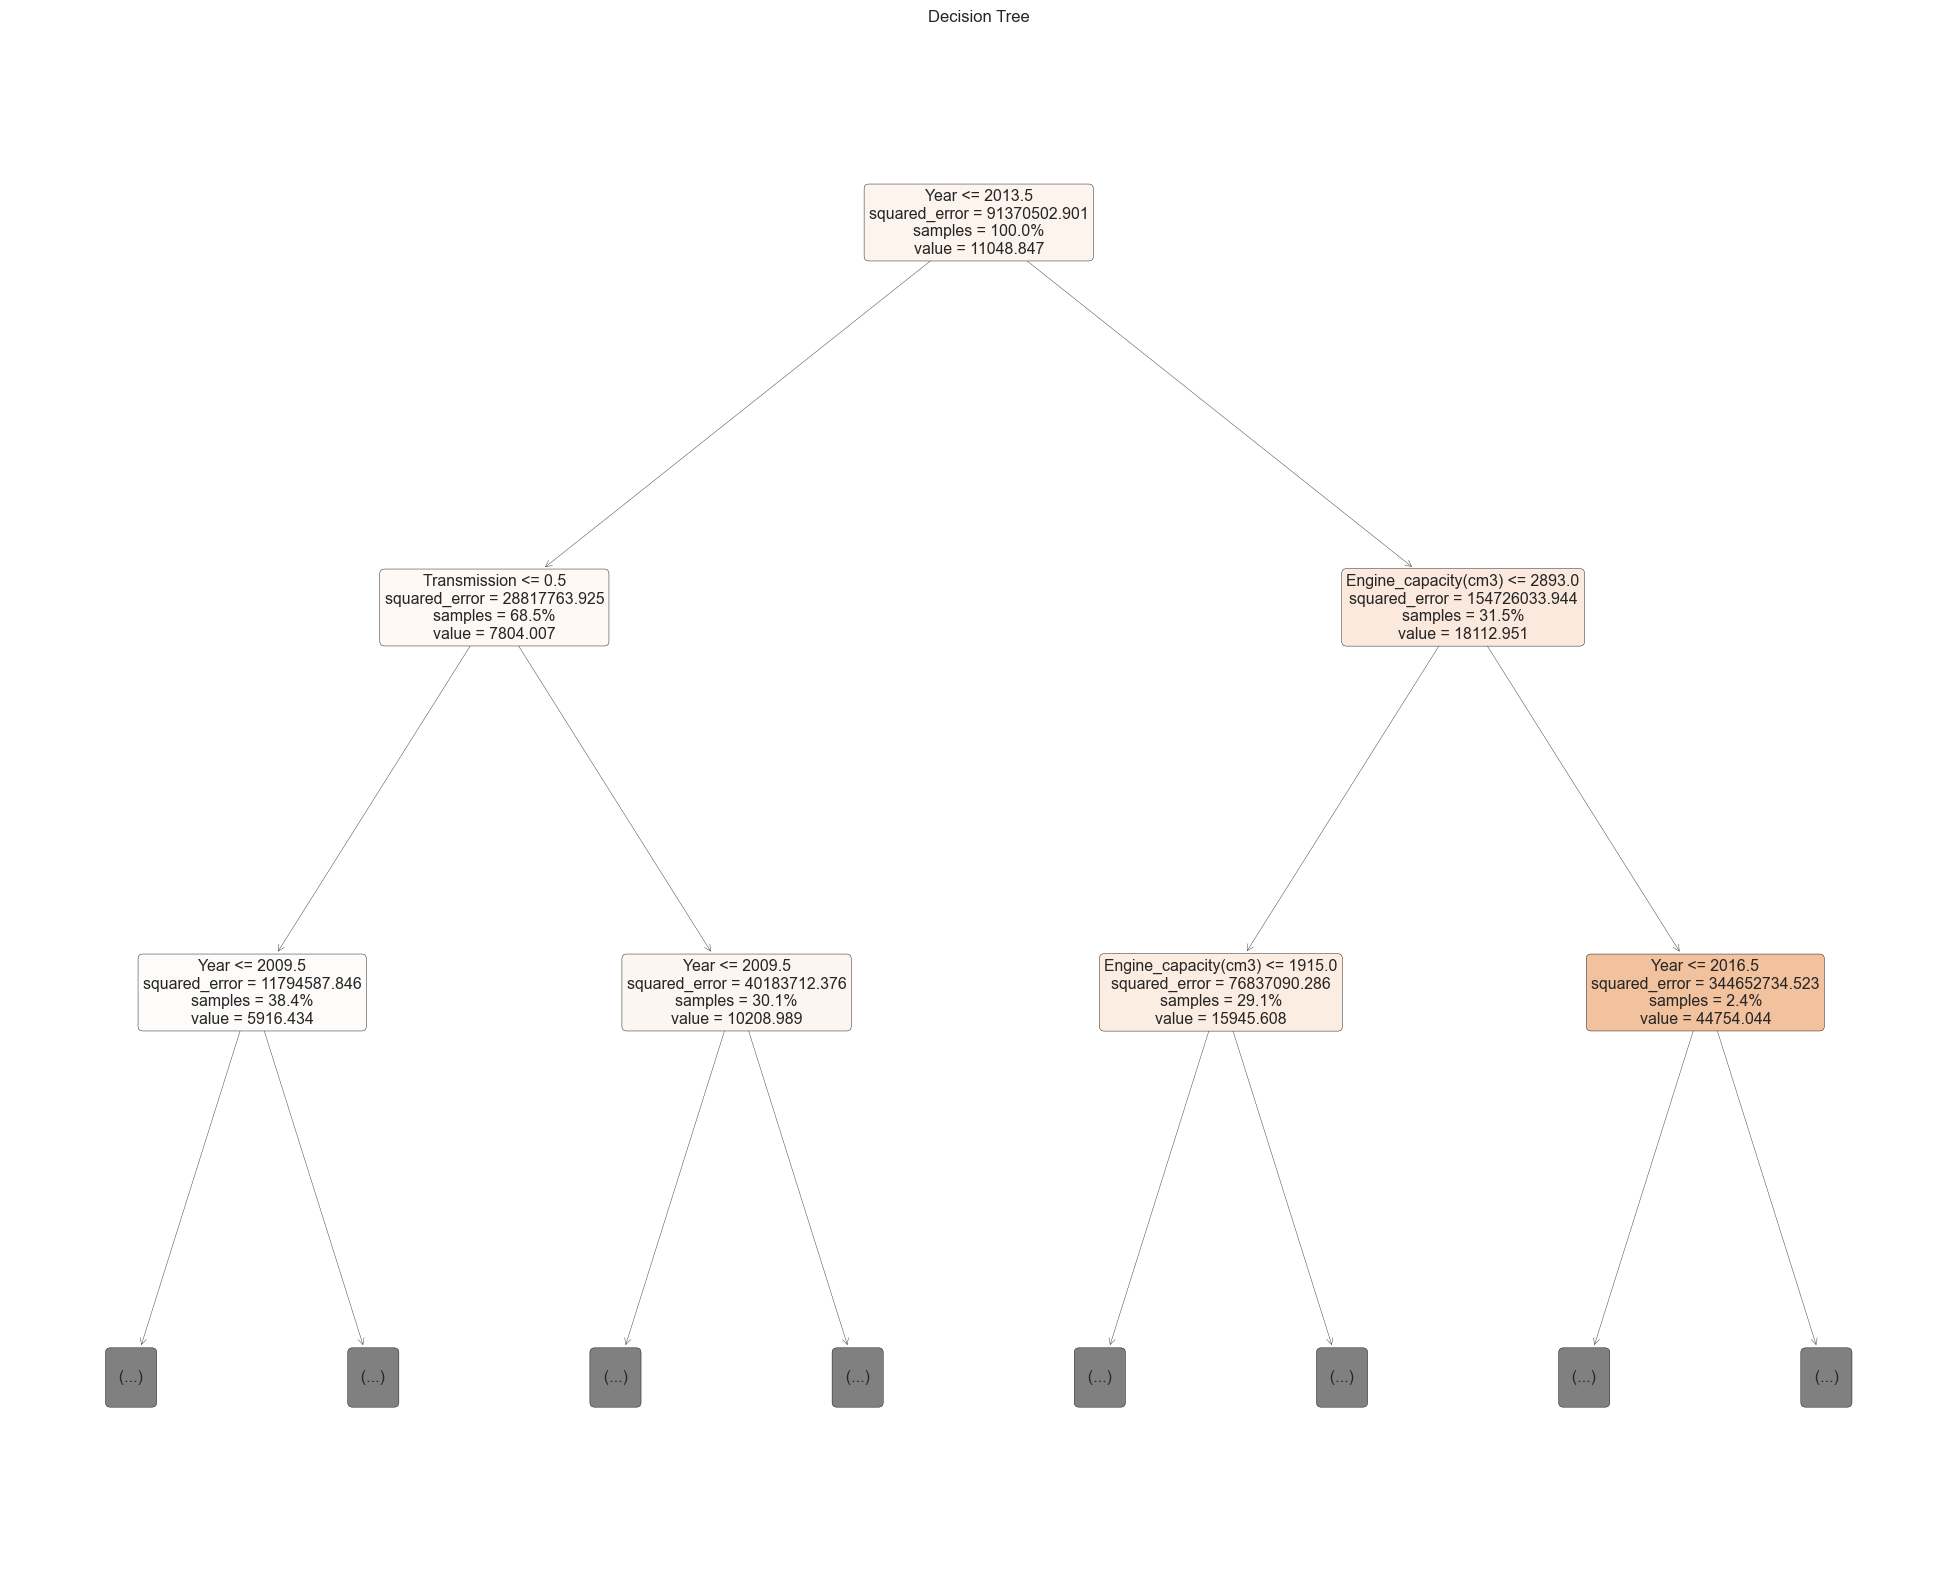

Regression Tree |--- Year <= 2013.50
|   |--- Transmission <= 0.50
|   |   |--- Year <= 2009.50
|   |   |   |--- truncated branch of depth 5
|   |   |--- Year >  2009.50
|   |   |   |--- truncated branch of depth 5
|   |--- Transmission >  0.50
|   |   |--- Year <= 2009.50
|   |   |   |--- truncated branch of depth 5
|   |   |--- Year >  2009.50
|   |   |   |--- truncated branch of depth 5
|--- Year >  2013.50
|   |--- Engine_capacity(cm3) <= 2893.00
|   |   |--- Engine_capacity(cm3) <= 1915.00
|   |   |   |--- truncated branch of depth 5
|   |   |--- Engine_capacity(cm3) >  1915.00
|   |   |   |--- truncated branch of depth 5
|   |--- Engine_capacity(cm3) >  2893.00
|   |   |--- Year <= 2016.50
|   |   |   |--- truncated branch of depth 5
|   |   |--- Year >  2016.50
|   |   |   |--- truncated branch of depth 5



In [9]:
# Для регрессии
plt.figure(figsize=(25, 20))
tree.plot_tree(
    best_dt_regressor,
    feature_names=reg_features,
    filled=True,
    rounded=True,
    proportion=True,
    max_depth=2,
)
plt.title("Decision Tree")
plt.show()

# Текстовое представление правил
tree_rules_reg = export_text(
    best_dt_regressor,
    feature_names=reg_features,
    max_depth=2
)
print("Regression Tree", tree_rules_reg)

1. Бэггинг
Создание множества независимых моделей на разных подвыборках данных, затем усреднение их результатов.ьМодели обучаются параллельно.
2. Бустинг
Последовательное обучение моделей, где каждая следующая модель исправляет ошибки предыдущей.
3. Стэкинг
Комбинация предсказаний разнородных моделей. Обучение на их выходах.

In [14]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, recall_score, roc_auc_score
from sklearn.metrics import mean_squared_error, r2_score

# Функция для оценки классификаторов
def evaluate_classifier(model, X_test, y_test):
    y_pred = model.predict(X_test)
    return {
        'Accuracy': accuracy_score(y_test, y_pred),
        'F1': f1_score(y_test, y_pred)
    }

# Функция для оценки регрессоров
def evaluate_regressor(model, X_test, y_test):
    y_pred = model.predict(X_test)
    return {
        'MSE': mean_squared_error(y_test, y_pred),
        'R2': r2_score(y_test, y_pred)
    }

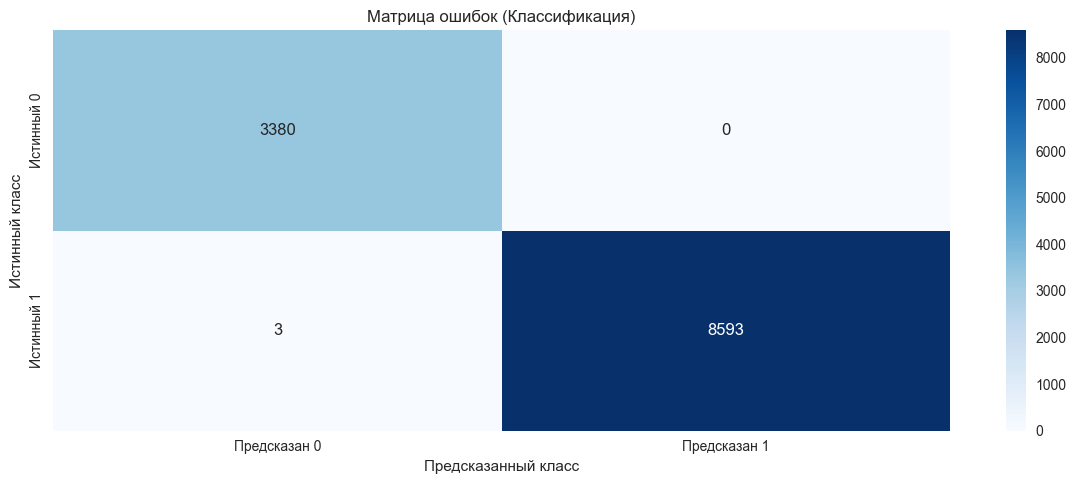

['models/bagging_model.pkl']

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc, confusion_matrix, r2_score

# Bagging
# Классификация
bagging_clf = BaggingClassifier(random_state=42)
param_grid = {
    'n_estimators': [50, 100],
    'max_samples': [0.7, 1.0]
}
grid_search = GridSearchCV(bagging_clf, param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_class_train, y_class_train)
best_bagging_clf = grid_search.best_estimator_

plt.figure(figsize=(12, 5))
# Матрица ошибок
y_pred = best_bagging_clf.predict(X_class_test)
cm = confusion_matrix(y_class_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
           xticklabels=['Предсказан 0', 'Предсказан 1'],
           yticklabels=['Истинный 0', 'Истинный 1'])
plt.title('Матрица ошибок (Классификация)')
plt.ylabel('Истинный класс')
plt.xlabel('Предсказанный класс')
plt.tight_layout()
plt.show()

from joblib import dump

dump(best_bagging_clf, 'models/bagging_model.pkl')

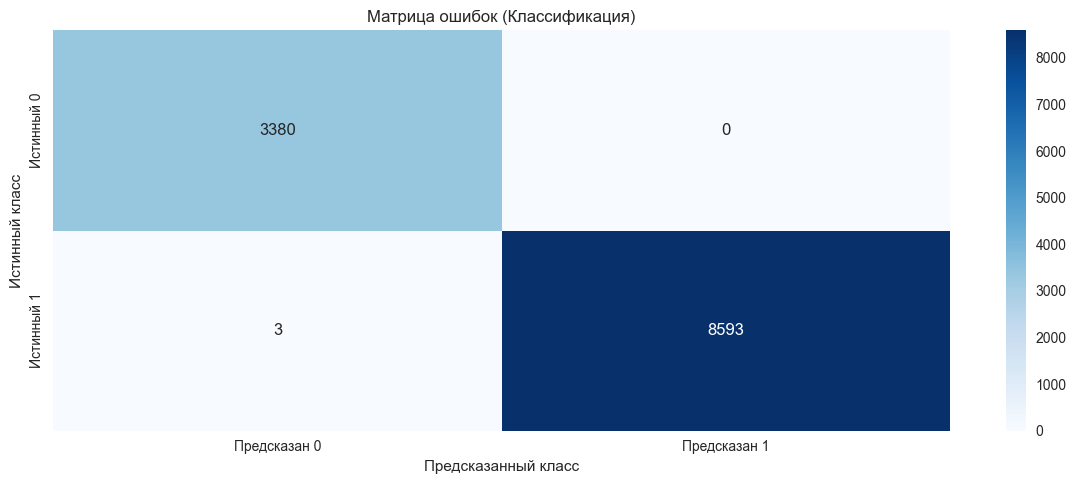

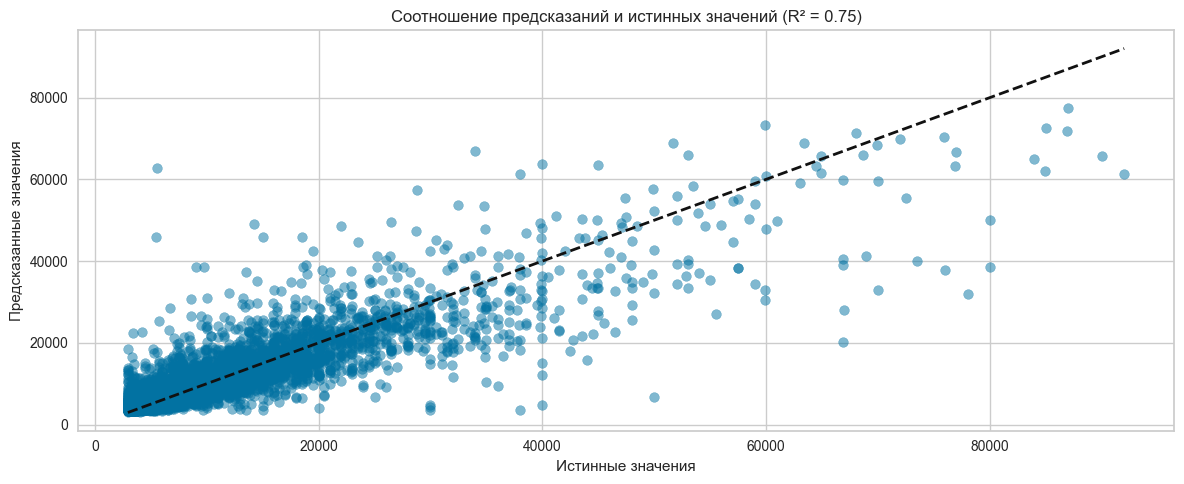

In [29]:
# Регрессия
bagging_reg = BaggingRegressor(random_state=42)
param_grid = {
    'n_estimators': [50, 100],
    'max_samples': [0.7, 1.0]
}
grid_search = GridSearchCV(bagging_reg, param_grid, cv=3, scoring='r2')
grid_search.fit(X_reg_train, y_reg_train)
best_bagging_reg = grid_search.best_estimator_

plt.figure(figsize=(12, 5))
# График предсказанных и истинных значений
y_pred_reg = best_bagging_reg.predict(X_reg_test)
r2 = r2_score(y_reg_test, y_pred_reg)

plt.scatter(y_reg_test, y_pred_reg, alpha=0.5)
plt.plot([y_reg_test.min(), y_reg_test.max()], 
         [y_reg_test.min(), y_reg_test.max()], 
         'k--', lw=2)
plt.xlabel('Истинные значения')
plt.ylabel('Предсказанные значения')
plt.title(f'Соотношение предсказаний и истинных значений (R² = {r2:.2f})')
plt.tight_layout()
plt.show()

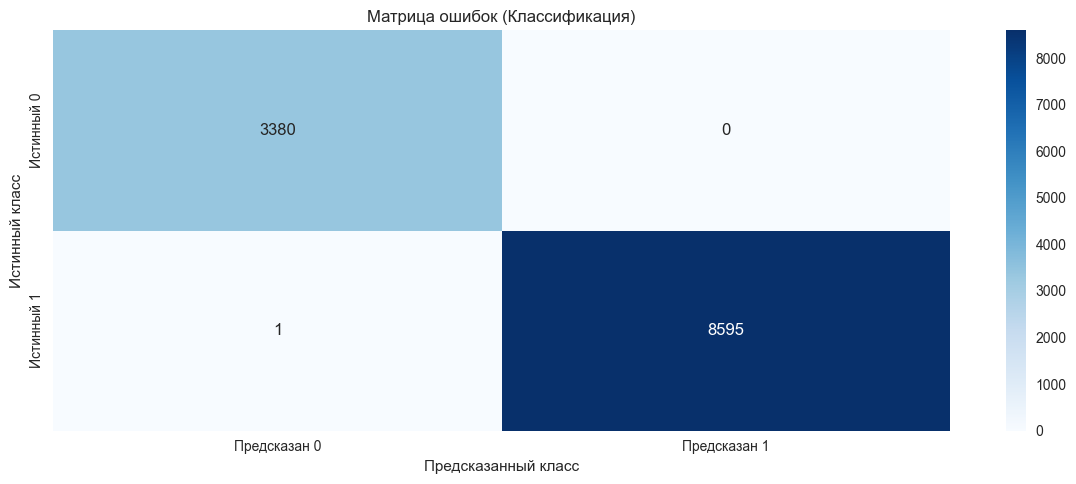

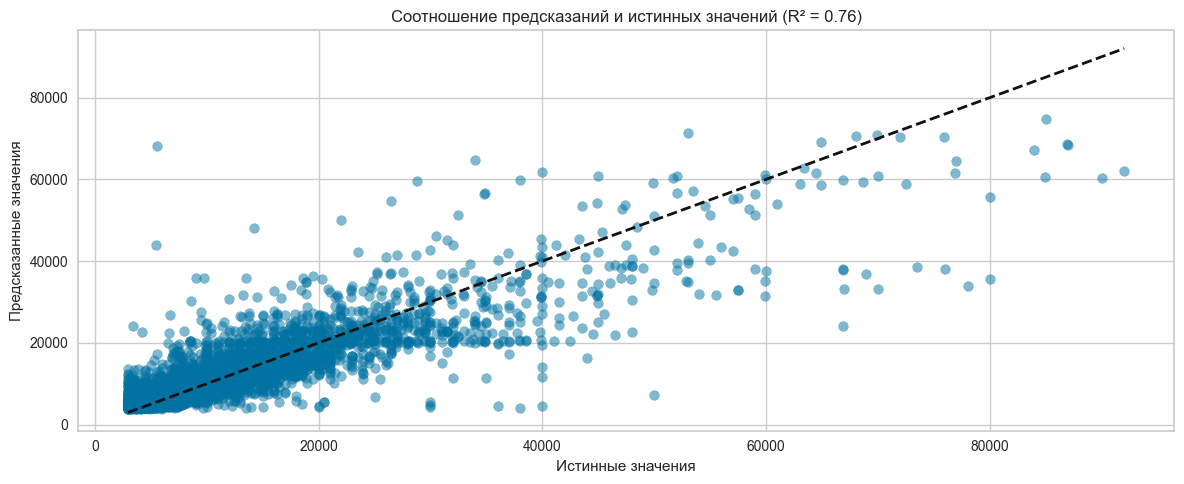

In [16]:
# Random Forest
# Классификация
rf_clf = RandomForestClassifier(random_state=42)
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5]
}
grid_search = GridSearchCV(rf_clf, param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_class_train, y_class_train)
best_rf_clf = grid_search.best_estimator_

plt.figure(figsize=(12, 5))
# Матрица ошибок
y_pred = best_rf_clf.predict(X_class_test)
cm = confusion_matrix(y_class_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
           xticklabels=['Предсказан 0', 'Предсказан 1'],
           yticklabels=['Истинный 0', 'Истинный 1'])
plt.title('Матрица ошибок (Классификация)')
plt.ylabel('Истинный класс')
plt.xlabel('Предсказанный класс')
plt.tight_layout()
plt.show()


# Регрессия
rf_reg = RandomForestRegressor(random_state=42)
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5]
}
grid_search = GridSearchCV(rf_reg, param_grid, cv=3, scoring='r2')
grid_search.fit(X_reg_train, y_reg_train)
best_rf_reg = grid_search.best_estimator_

plt.figure(figsize=(12, 5))
# График предсказанных и истинных значений
y_pred_reg = best_rf_reg.predict(X_reg_test)
r2 = r2_score(y_reg_test, y_pred_reg)

plt.scatter(y_reg_test, y_pred_reg, alpha=0.5)
plt.plot([y_reg_test.min(), y_reg_test.max()], 
         [y_reg_test.min(), y_reg_test.max()], 
         'k--', lw=2)
plt.xlabel('Истинные значения')
plt.ylabel('Предсказанные значения')
plt.title(f'Соотношение предсказаний и истинных значений (R² = {r2:.2f})')
plt.tight_layout()
plt.show()

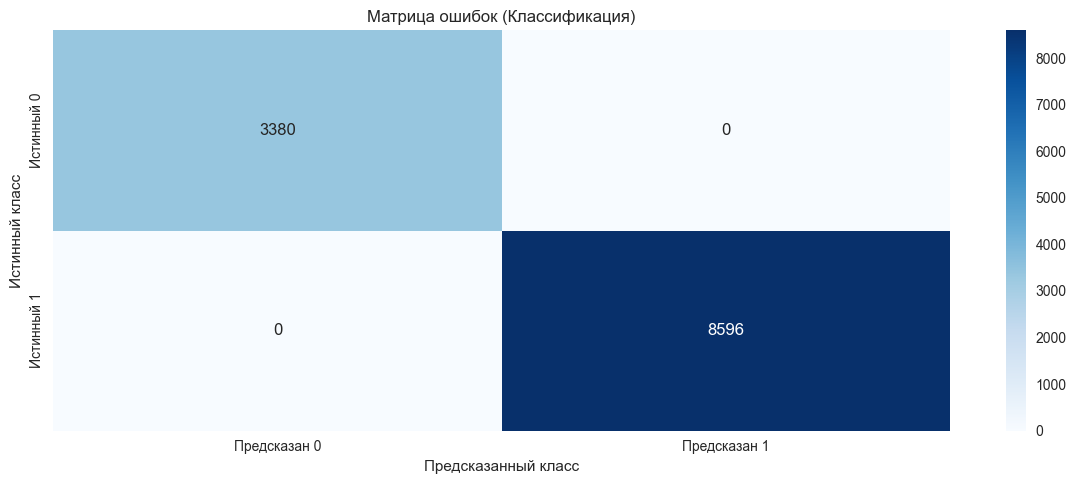

['models/gb_model.pkl']

In [58]:
# Gradient Boosting
# Классификация
gb_clf = GradientBoostingClassifier(random_state=42)
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 5]
}
grid_search = GridSearchCV(gb_clf, param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_class_train, y_class_train)
best_gb_clf = grid_search.best_estimator_

plt.figure(figsize=(12, 5))
# Матрица ошибок
y_pred = best_gb_clf.predict(X_class_test)
cm = confusion_matrix(y_class_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
           xticklabels=['Предсказан 0', 'Предсказан 1'],
           yticklabels=['Истинный 0', 'Истинный 1'])
plt.title('Матрица ошибок (Классификация)')
plt.ylabel('Истинный класс')
plt.xlabel('Предсказанный класс')
plt.tight_layout()
plt.show()

from joblib import dump

dump(best_gb_clf, 'models/gb_model.pkl')

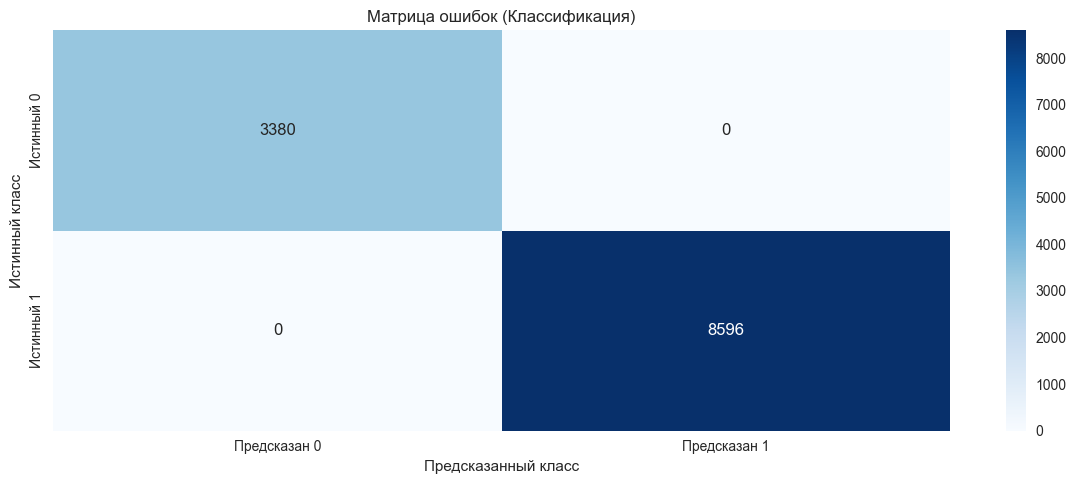

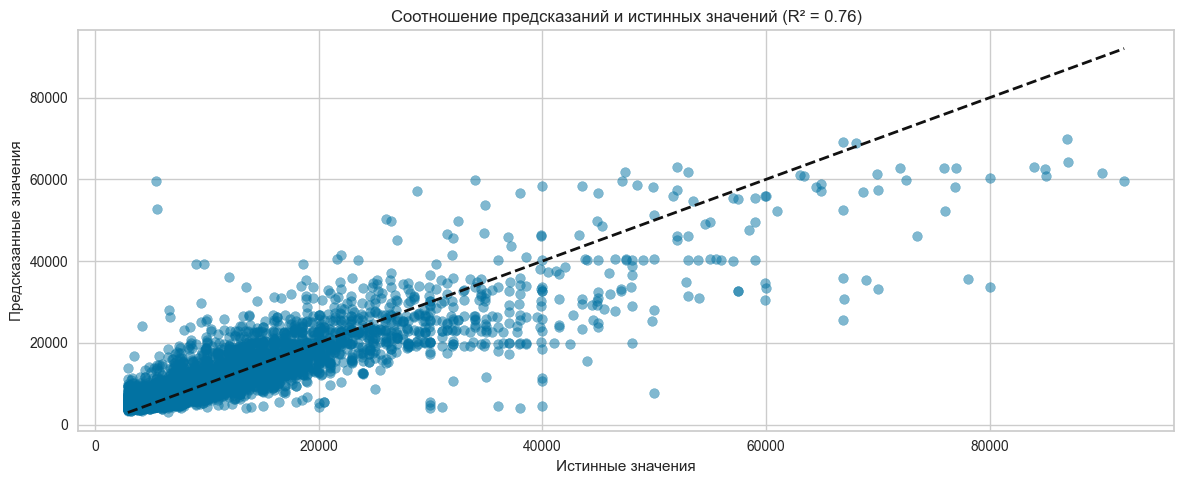

In [30]:
# Регрессия
gb_reg = GradientBoostingRegressor(random_state=42)
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 5]
}
grid_search = GridSearchCV(gb_reg, param_grid, cv=3, scoring='r2')
grid_search.fit(X_reg_train, y_reg_train)
best_gb_reg = grid_search.best_estimator_

plt.figure(figsize=(12, 5))
# График предсказанных и истинных значений
y_pred_reg = best_gb_reg.predict(X_reg_test)
r2 = r2_score(y_reg_test, y_pred_reg)

plt.scatter(y_reg_test, y_pred_reg, alpha=0.5)
plt.plot([y_reg_test.min(), y_reg_test.max()], 
         [y_reg_test.min(), y_reg_test.max()], 
         'k--', lw=2)
plt.xlabel('Истинные значения')
plt.ylabel('Предсказанные значения')
plt.title(f'Соотношение предсказаний и истинных значений (R² = {r2:.2f})')
plt.tight_layout()
plt.show()

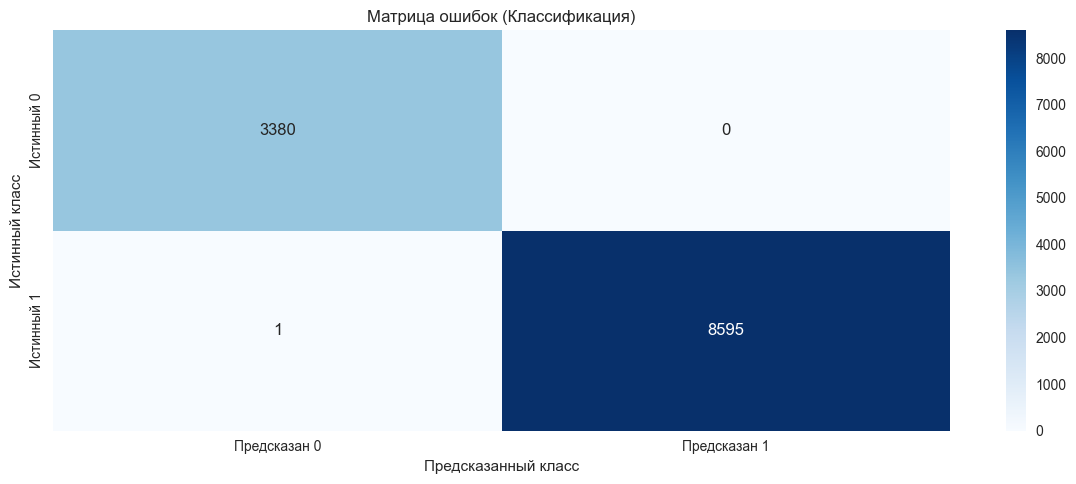

['models/stacking_model.pkl']

In [59]:
# Stacking
# Классификация
estimators = [
    ('rf', RandomForestClassifier(n_estimators=50, random_state=42)),
    ('gb', GradientBoostingClassifier(n_estimators=50, random_state=42))
]
stacking_clf = StackingClassifier(
    estimators=estimators,
    final_estimator=LogisticRegression()
)
stacking_clf.fit(X_class_train, y_class_train)

plt.figure(figsize=(12, 5))
# Матрица ошибок
y_pred = stacking_clf.predict(X_class_test)
cm = confusion_matrix(y_class_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
           xticklabels=['Предсказан 0', 'Предсказан 1'],
           yticklabels=['Истинный 0', 'Истинный 1'])
plt.title('Матрица ошибок (Классификация)')
plt.ylabel('Истинный класс')
plt.xlabel('Предсказанный класс')
plt.tight_layout()
plt.show()

from joblib import dump

dump(stacking_clf, 'models/stacking_model.pkl')



In [ ]:
from joblib import dump
dump(model, 'model.joblib')

In [ ]:
# Регрессия
estimators = [
    ('rf', RandomForestRegressor(n_estimators=50, random_state=42)),
    ('gb', GradientBoostingRegressor(n_estimators=50, random_state=42))
]
stacking_reg = StackingRegressor(
    estimators=estimators,
    final_estimator=Ridge()
)
stacking_reg.fit(X_reg_train, y_reg_train)

plt.figure(figsize=(12, 5))
# График предсказанных и истинных значений
y_pred_reg = stacking_reg.predict(X_reg_test)
r2 = r2_score(y_reg_test, y_pred_reg)

plt.scatter(y_reg_test, y_pred_reg, alpha=0.5)
plt.plot([y_reg_test.min(), y_reg_test.max()], 
         [y_reg_test.min(), y_reg_test.max()], 
         'k--', lw=2)
plt.xlabel('Истинные значения')
plt.ylabel('Предсказанные значения')
plt.title(f'Соотношение предсказаний и истинных значений (R² = {r2:.2f})')
plt.tight_layout()
plt.show()

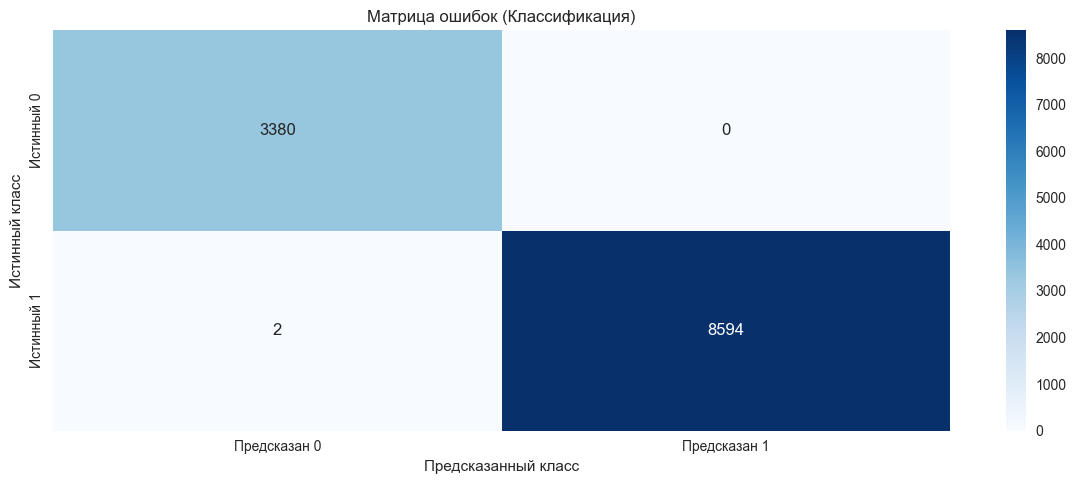

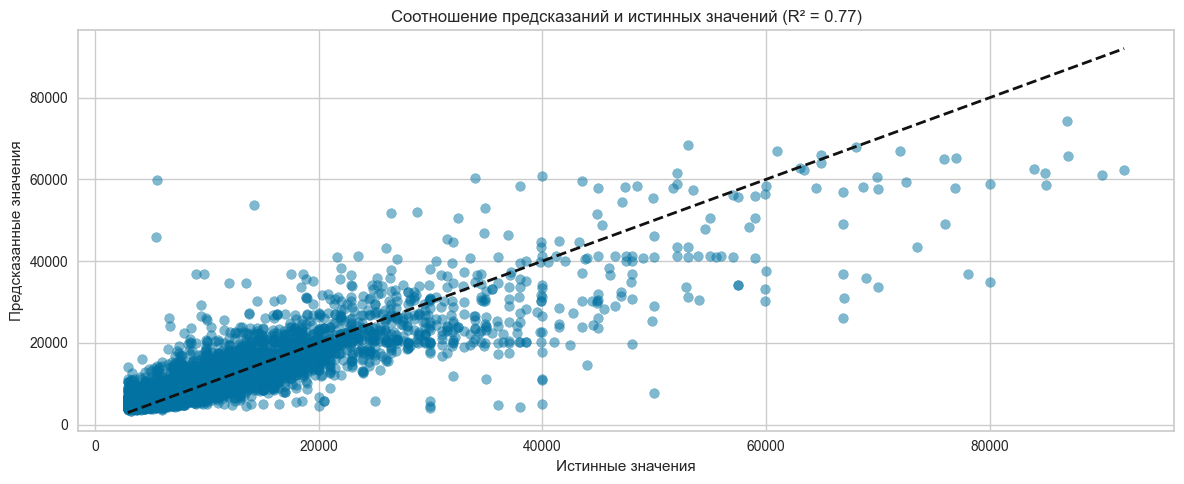

In [22]:
from catboost import CatBoostClassifier, CatBoostRegressor

# Классификация
cat_clf = CatBoostClassifier(
    iterations=500,
    learning_rate=0.05,
    depth=6,
    silent=True,
    random_state=42
)
cat_clf.fit(X_class_train, y_class_train, eval_set=(X_class_test, y_class_test))

plt.figure(figsize=(12, 5))
# Матрица ошибок
y_pred = cat_clf.predict(X_class_test)
cm = confusion_matrix(y_class_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
           xticklabels=['Предсказан 0', 'Предсказан 1'],
           yticklabels=['Истинный 0', 'Истинный 1'])
plt.title('Матрица ошибок (Классификация)')
plt.ylabel('Истинный класс')
plt.xlabel('Предсказанный класс')
plt.tight_layout()
plt.show()

cat_clf.save_model('models/catboost_model.cbm')

# Регрессия
cat_reg = CatBoostRegressor(
    iterations=500,
    learning_rate=0.05,
    depth=6,
    silent=True,
    random_state=42
)
cat_reg.fit(X_reg_train, y_reg_train, eval_set=(X_reg_test, y_reg_test))

plt.figure(figsize=(12, 5))
# График предсказанных и истинных значений
y_pred_reg = cat_reg.predict(X_reg_test)
r2 = r2_score(y_reg_test, y_pred_reg)

plt.scatter(y_reg_test, y_pred_reg, alpha=0.5)
plt.plot([y_reg_test.min(), y_reg_test.max()], 
         [y_reg_test.min(), y_reg_test.max()], 
         'k--', lw=2)
plt.xlabel('Истинные значения')
plt.ylabel('Предсказанные значения')
plt.title(f'Соотношение предсказаний и истинных значений (R² = {r2:.2f})')
plt.tight_layout()
plt.show()

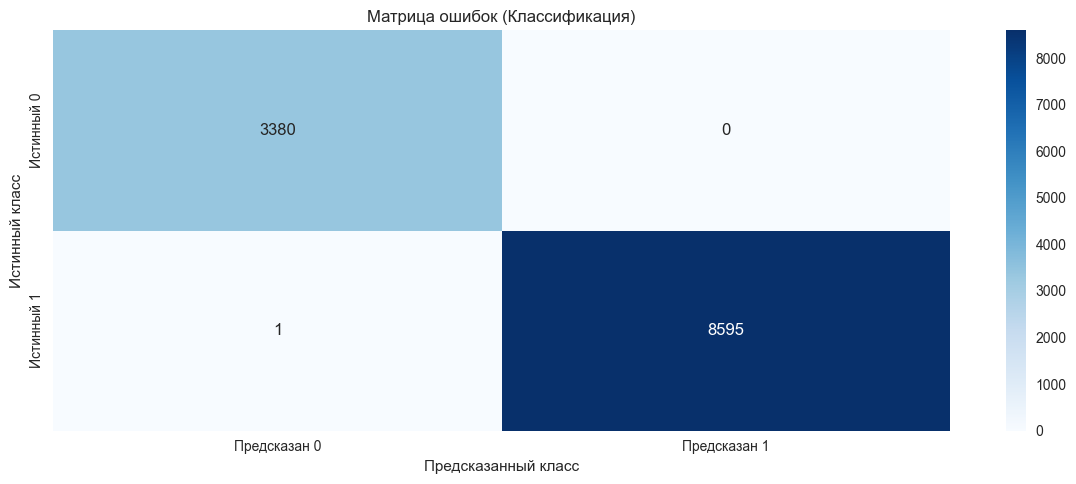

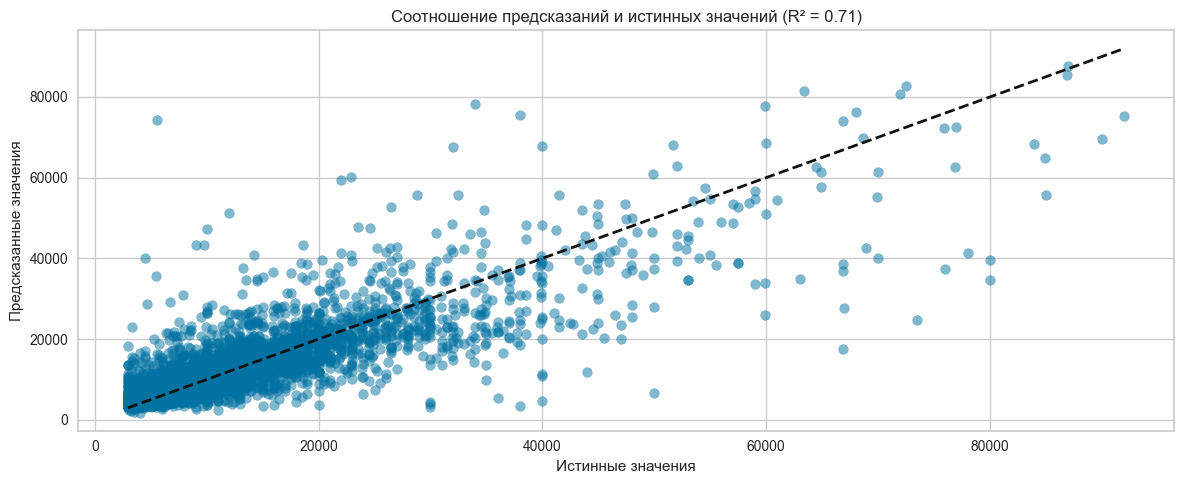

In [16]:
from xgboost import XGBClassifier, XGBRegressor

# Классификация
xgb_clf = XGBClassifier(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=6,
    random_state=42
)
xgb_clf.fit(X_class_train, y_class_train)

plt.figure(figsize=(12, 5))
# Матрица ошибок
y_pred = xgb_clf.predict(X_class_test)
cm = confusion_matrix(y_class_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
           xticklabels=['Предсказан 0', 'Предсказан 1'],
           yticklabels=['Истинный 0', 'Истинный 1'])
plt.title('Матрица ошибок (Классификация)')
plt.ylabel('Истинный класс')
plt.xlabel('Предсказанный класс')
plt.tight_layout()
plt.show()


# Регрессия
xgb_reg = XGBRegressor(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=13,
    random_state=42
)
xgb_reg.fit(X_reg_train, y_reg_train)

plt.figure(figsize=(12, 5))
# График предсказанных и истинных значений
y_pred_reg = xgb_reg.predict(X_reg_test)
r2 = r2_score(y_reg_test, y_pred_reg)

plt.scatter(y_reg_test, y_pred_reg, alpha=0.5)
plt.plot([y_reg_test.min(), y_reg_test.max()], 
         [y_reg_test.min(), y_reg_test.max()], 
         'k--', lw=2)
plt.xlabel('Истинные значения')
plt.ylabel('Предсказанные значения')
plt.title(f'Соотношение предсказаний и истинных значений (R² = {r2:.2f})')
plt.tight_layout()
plt.show()

[LightGBM] [Info] Number of positive: 34661, number of negative: 13240
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001040 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3034
[LightGBM] [Info] Number of data points in the train set: 47901, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.723597 -> initscore=0.962373
[LightGBM] [Info] Start training from score 0.962373
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


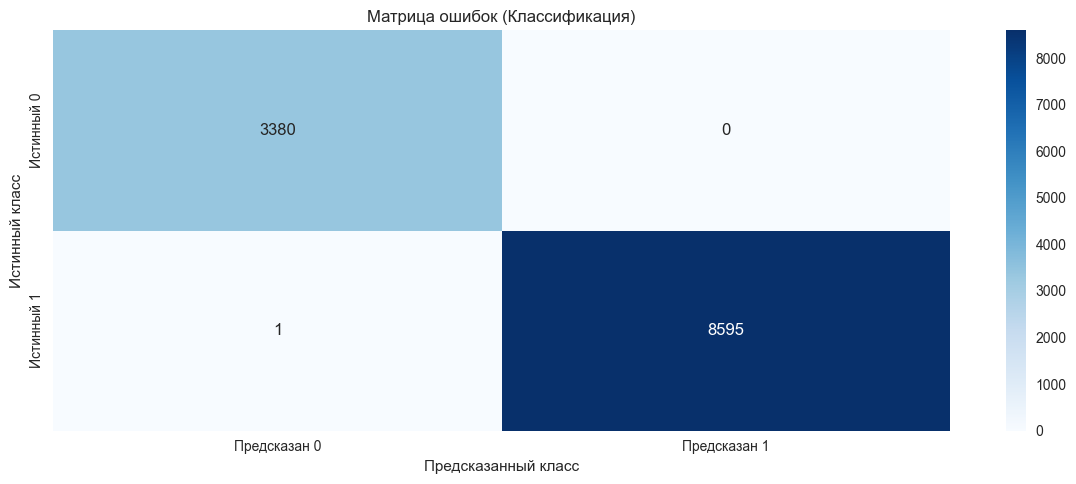

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000253 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 500
[LightGBM] [Info] Number of data points in the train set: 22846, number of used features: 4
[LightGBM] [Info] Start training from score 11048.846975


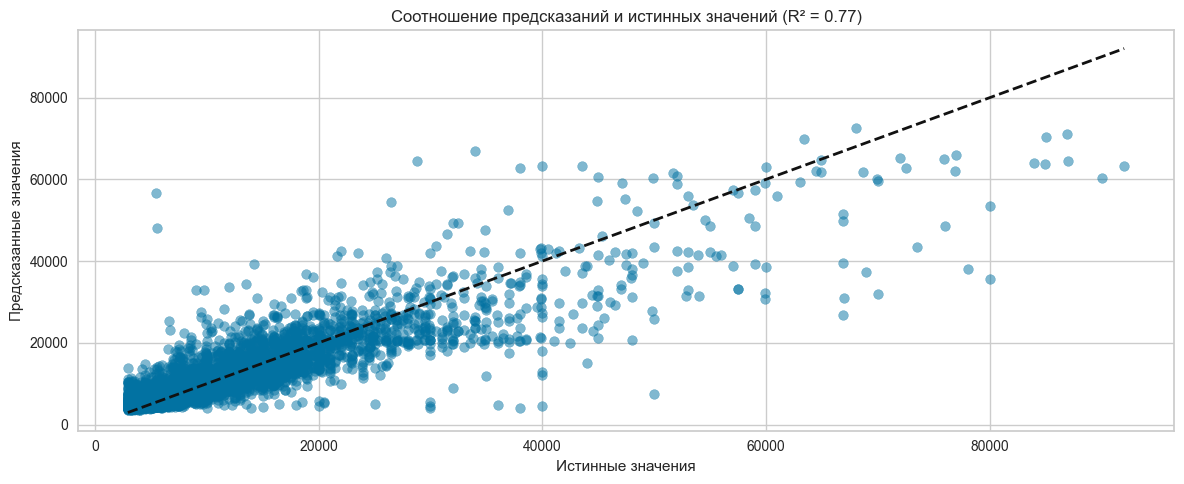

In [17]:
from lightgbm import LGBMClassifier, LGBMRegressor

# Классификация
lgbm_clf = LGBMClassifier(
    n_estimators=200,
    learning_rate=0.05,
    max_depth=7,
    random_state=42
)
lgbm_clf.fit(X_class_train, y_class_train)

plt.figure(figsize=(12, 5))
# Матрица ошибок
y_pred = lgbm_clf.predict(X_class_test)
cm = confusion_matrix(y_class_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
           xticklabels=['Предсказан 0', 'Предсказан 1'],
           yticklabels=['Истинный 0', 'Истинный 1'])
plt.title('Матрица ошибок (Классификация)')
plt.ylabel('Истинный класс')
plt.xlabel('Предсказанный класс')
plt.tight_layout()
plt.show()


# Регрессия
lgbm_reg = LGBMRegressor(
    n_estimators=200,
    learning_rate=0.05,
    max_depth=15,
    random_state=42
)
lgbm_reg.fit(X_reg_train, y_reg_train)

plt.figure(figsize=(12, 5))
# График предсказанных и истинных значений
y_pred_reg = lgbm_reg.predict(X_reg_test)
r2 = r2_score(y_reg_test, y_pred_reg)

plt.scatter(y_reg_test, y_pred_reg, alpha=0.5)
plt.plot([y_reg_test.min(), y_reg_test.max()], 
         [y_reg_test.min(), y_reg_test.max()], 
         'k--', lw=2)
plt.xlabel('Истинные значения')
plt.ylabel('Предсказанные значения')
plt.title(f'Соотношение предсказаний и истинных значений (R² = {r2:.2f})')
plt.tight_layout()
plt.show()

In [18]:
models_clf = {
    'DT': best_dt_classifier,
    'Bagging': best_bagging_clf,
    'Random Forest': best_rf_clf,
    'Gradient Boosting': best_gb_clf,
    'Stacking': stacking_clf,
    'CatBoost': cat_clf,
    'XGB': xgb_clf,
    'LGBM': lgbm_clf
    
}

results_clf = {}
for name, model in models_clf.items():
    results_clf[name] = evaluate_classifier(model, X_class_test, y_class_test)

# Регрессия
models_reg = {
    'DT': best_dt_regressor,
    'Bagging': best_bagging_reg,
    'Random Forest': best_rf_reg,
    'Gradient Boosting': best_gb_reg,
    'Stacking': stacking_reg,
    'CatBoost': cat_reg,
    'XGB': xgb_reg,
    'LGBM': lgbm_reg
}

In [19]:
import pandas as pd
import numpy as np
from sklearn.metrics import (
    accuracy_score, f1_score, roc_auc_score, recall_score, precision_score,
    cohen_kappa_score, matthews_corrcoef, mean_absolute_error,
    mean_squared_error, r2_score, mean_squared_log_error, mean_absolute_percentage_error
)

def evaluate_classifier(model, X_test, y_test):
    y_pred = model.predict(X_test)
    metrics = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'F1': f1_score(y_test, y_pred),
        'Kappa': cohen_kappa_score(y_test, y_pred),
        'MCC': matthews_corrcoef(y_test, y_pred)
    }
    try:
        y_pred_proba = model.predict_proba(X_test)[:, 1]
        metrics['AUC'] = roc_auc_score(y_test, y_pred_proba)
    except (AttributeError, IndexError):
        metrics['AUC'] = np.nan
    return metrics

def evaluate_regressor(model, X_test, y_test):
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    try:
        rmsle = np.sqrt(mean_squared_log_error(y_test, y_pred))
    except ValueError:
        rmsle = np.nan
    mape = mean_absolute_percentage_error(y_test, y_pred)
    return {
        'MAE': mean_absolute_error(y_test, y_pred),
        'MSE': mse,
        'RMSE': rmse,
        'R2': r2_score(y_test, y_pred),
        'RMSLE': rmsle,
        'MAPE': mape
    }

classification_results = []
for name, model in models_clf.items():
    metrics = evaluate_classifier(model, X_class_test, y_class_test)
    classification_results.append({
        'Model': name,
        'Accuracy': metrics['Accuracy'],
        'AUC': metrics['AUC'],
        'Recall': metrics['Recall'],
        'Precision': metrics['Precision'],
        'F1-Score': metrics['F1'],
        'Kappa': metrics['Kappa'],
        'MCC': metrics['MCC']
    })

regression_results = []
for name, model in models_reg.items():
    metrics = evaluate_regressor(model, X_reg_test, y_reg_test)
    regression_results.append({
        'Model': name,
        'MAE': metrics['MAE'],
        'MSE': metrics['MSE'],
        'RMSE': metrics['RMSE'],
        'R2-Score': metrics['R2'],
        'RMSLE': metrics['RMSLE'],
        'MAPE': metrics['MAPE']
    })

classification_df = pd.DataFrame(classification_results)
regression_df = pd.DataFrame(regression_results)

print("Classification Results:")
print(classification_df.to_string(index=False))

print("\nRegression Results:")
print(regression_df.to_string(index=False))

Classification Results:
            Model  Accuracy      AUC   Recall  Precision  F1-Score    Kappa      MCC
               DT  0.998246 0.998530 1.000000   0.997563  0.998780 0.995664 0.995673
          Bagging  0.999749 1.000000 0.999651   1.000000  0.999825 0.999382 0.999382
    Random Forest  0.999916 1.000000 0.999884   1.000000  0.999942 0.999794 0.999794
Gradient Boosting  1.000000 1.000000 1.000000   1.000000  1.000000 1.000000 1.000000
         Stacking  0.999916 1.000000 0.999884   1.000000  0.999942 0.999794 0.999794
         CatBoost  0.999833 1.000000 0.999767   1.000000  0.999884 0.999588 0.999588
              XGB  0.999916 1.000000 0.999884   1.000000  0.999942 0.999794 0.999794
             LGBM  0.999916 0.999999 0.999884   1.000000  0.999942 0.999794 0.999794

Regression Results:
            Model         MAE          MSE        RMSE  R2-Score    RMSLE     MAPE
               DT 2852.353101 2.472216e+07 4972.137944  0.742861 0.338009 0.284451
          Bagging 2780.9

## Топ-3 модели для классификации:
1. Gradient Boosting: Accuracy: 1.000. все метрики (AUC, Recall, Precision, F1, Kappa, MCC) достигли максимальных значений (1.0).
2. Stacking / Random Forest / XGB / LGBM: Accuracy: 0.9999, все метрики идентичны и почти максимальны (AUC = 1.0, F1 = 0.9999).
3. CatBoost: Accuracy: 0.9998. Немного ниже по всем метрикам, но всё равно выдаёт высокие результаты.

## Топ-3 модели для регрессии:
1. LGBM (LightGBM). R²: 0.7723 (наивысший). Самая низкая MAE (2675.8) и MSE (2.19e+07).
2. CatBoost. R²: 0.7693. Очень близкие к LGBM показатели (MAE = 2701.0, MSE = 2.22e+07).
3. Random Forest: R² = 0.7626.

# Использование PyCaret
- PyCaret - это библиотека машинного обучения с открытым исходным кодом на Python, которая автоматизирует рабочие процессы машинного обучения

In [20]:
from pycaret.classification import *
import pandas as pd
from sklearn.model_selection import train_test_split

# Настройка эксперимента PyCaret
clf_exp = setup(data=df_class, 
                target='Fire Alarm',
                ignore_features=[col for col in df_class.columns if col not in class_features + [class_label]],
                session_id=42,
                train_size=0.8)

# Сравнение моделей
best_clf = compare_models(n_select=3)

# Вывод результатов
print("\nТоп-3 модели классификации:")
for i, model in enumerate(best_clf, 1):
    print(f"{i}. {type(model).__name__}")


,Description,Value
0,Session id,42
1,Target,Fire Alarm
2,Target type,Binary
3,Original data shape,"(59877, 13)"
4,Transformed data shape,"(59877, 13)"
5,Transformed train set shape,"(47901, 13)"
6,Transformed test set shape,"(11976, 13)"
7,Numeric features,12
8,Preprocess,True
9,Imputation type,simple


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9999,1.0000,0.9999,0.9999,0.9999,0.9998,0.9998,0.4610
et,Extra Trees Classifier,0.9999,1.0000,0.9999,1.0000,0.9999,0.9998,0.9998,0.1520
xgboost,Extreme Gradient Boosting,0.9998,1.0000,0.9999,0.9999,0.9999,0.9995,0.9995,0.1330
catboost,CatBoost Classifier,0.9998,1.0000,0.9999,0.9999,0.9999,0.9995,0.9995,3.7550
ada,Ada Boost Classifier,0.9997,1.0000,0.9999,0.9997,0.9998,0.9992,0.9992,0.2940
lightgbm,Light Gradient Boosting Machine,0.9997,1.0000,0.9998,0.9999,0.9998,0.9994,0.9994,0.1410
dt,Decision Tree Classifier,0.9996,0.9996,0.9997,0.9998,0.9998,0.9991,0.9991,0.0400
gbc,Gradient Boosting Classifier,0.9995,1.0000,0.9999,0.9995,0.9997,0.9988,0.9988,1.1150
knn,K Neighbors Classifier,0.9992,0.9998,0.9995,0.9994,0.9995,0.9981,0.9981,0.2380
qda,Quadratic Discriminant Analysis,0.9276,0.9841,0.9926,0.9145,0.9519,0.8062,0.8174,0.0260



Топ-3 модели классификации:
1. RandomForestClassifier
2. ExtraTreesClassifier
3. XGBClassifier


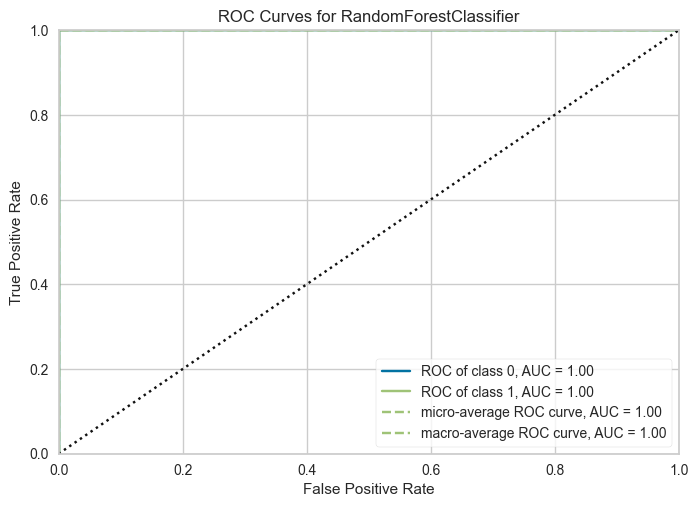

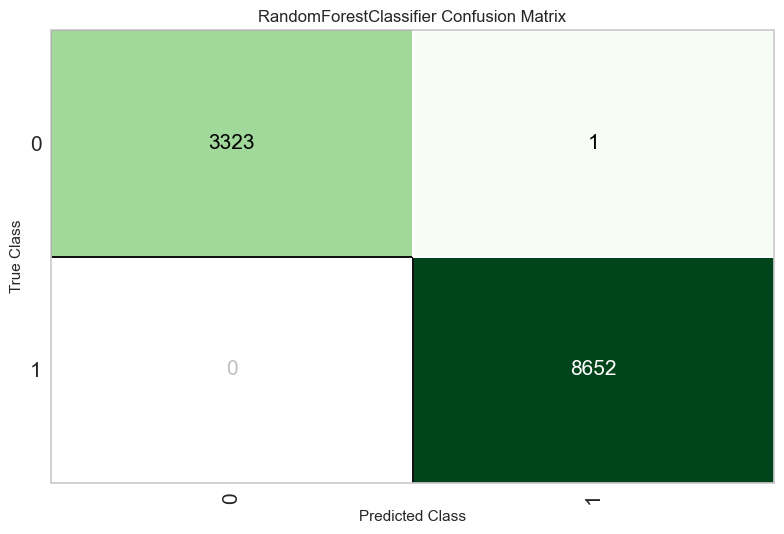

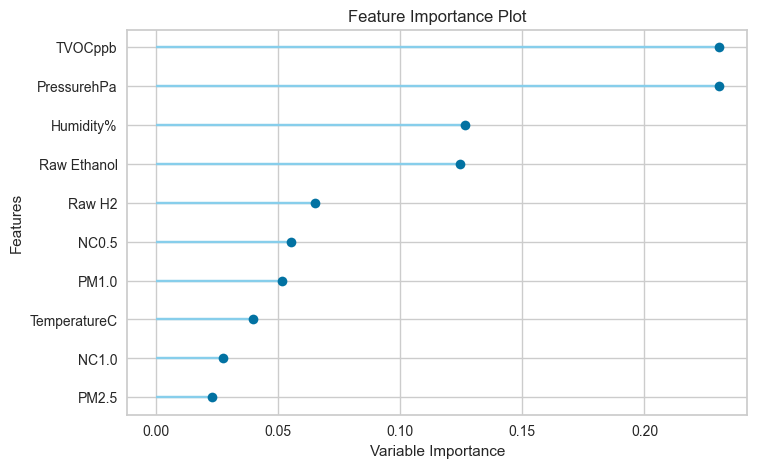

In [21]:
# Анализ лучшей модели
plot_model(best_clf[0], plot='auc')
plot_model(best_clf[0], plot='confusion_matrix')
plot_model(best_clf[0], plot='feature')

In [22]:
from pycaret.regression import *
# Регрессия
# Настройка эксперимента PyCaret
reg_exp = setup(data=df_reg, 
               target=reg_label,
               ignore_features=[col for col in df_reg.columns if col not in reg_features + [reg_label]],
               session_id=42,
               train_size=0.8)

# Сравнение моделей
best_reg = compare_models(n_select=3)

# Вывод результатов
print("\nТоп-3 модели регрессии:")
for i, model in enumerate(best_reg, 1):
    print(f"{i}. {type(model).__name__}")

,Description,Value
0,Session id,42
1,Target,Price(euro)
2,Target type,Regression
3,Original data shape,"(28558, 830)"
4,Transformed data shape,"(28558, 5)"
5,Transformed train set shape,"(22846, 5)"
6,Transformed test set shape,"(5712, 5)"
7,Ignore features,825
8,Numeric features,4
9,Preprocess,True


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,2658.1003,22678944.3563,4756.3941,0.7522,0.3233,0.2650,1.2370
lightgbm,Light Gradient Boosting Machine,2665.7976,22836652.9807,4773.2616,0.7504,0.3226,0.2657,0.0610
gbr,Gradient Boosting Regressor,2751.7251,23321384.3438,4823.2938,0.7452,0.3320,0.2774,0.1270
xgboost,Extreme Gradient Boosting,2694.1767,24198720.2531,4913.4097,0.7356,0.3359,0.2677,0.0410
rf,Random Forest Regressor,2822.4292,26736566.5269,5164.5956,0.7078,0.3462,0.2778,0.5640
et,Extra Trees Regressor,2964.5425,30227573.0046,5491.9153,0.6695,0.3684,0.2917,0.3830
dt,Decision Tree Regressor,3372.7755,40974345.6620,6393.8956,0.5513,0.4183,0.3269,0.0140
lar,Least Angle Regression,4031.0627,48303947.8505,6944.6701,0.4719,0.5712,0.4559,0.0080
lr,Linear Regression,4031.0627,48303947.8505,6944.6701,0.4719,0.5712,0.4559,0.0080
lasso,Lasso Regression,4030.9805,48303953.0143,6944.6703,0.4719,0.5709,0.4558,0.0070



Топ-3 модели регрессии:
1. CatBoostRegressor
2. LGBMRegressor
3. GradientBoostingRegressor


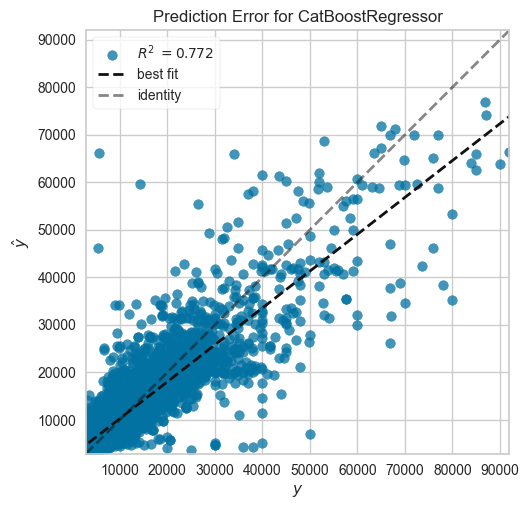

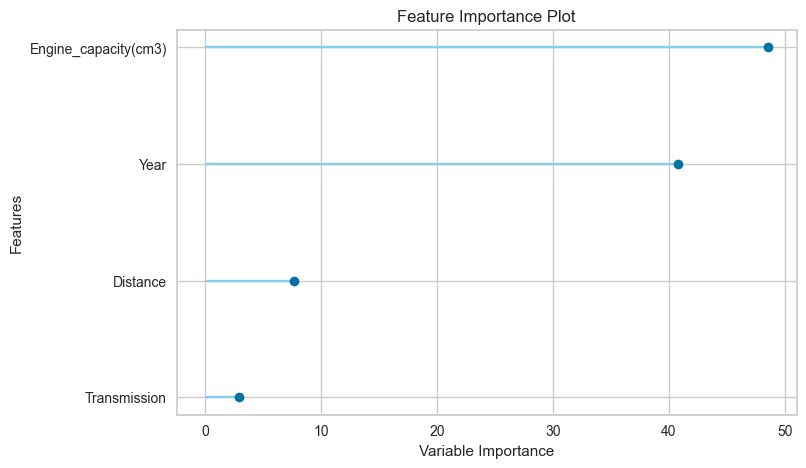

In [23]:
# Анализ лучшей модели
plot_model(best_reg[0], plot='error')
plot_model(best_reg[0], plot='feature')